<a href="https://colab.research.google.com/github/katia-kitaguti/recommendation-system/blob/main/202311_%7C_Recommendation_System_%7C_Amazon_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import auth
from google.auth import default
import gspread

from sklearn.preprocessing import LabelEncoder

# Base

In [ ]:
# Autenticando o acesso aos serviços do Google
auth.authenticate_user()
creds, _ = default()

In [ ]:
# leitura do Google Sheets
gc = gspread.authorize(creds)

In [ ]:
#Abrindo a Google Sheets
gc_sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/17IGoa1aRJhhznofYVCDlyvTHy5Aahgcatn4pLcm4c2M/edit#gid=722224088")

In [ ]:
#Selecionando a aba dos dados que contém o tamanho da Amostra 01
df_sales = pd.DataFrame(gc_sheets.worksheet("amazon").get_all_records())
df_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df_sales.dropna()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,09",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the mea

In [ ]:
df_sales.shape

(1465, 16)

In [ ]:
df_sales[df_sales['product_id']== 'B07JW9H4J1']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,27",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [ ]:
df_sales[df_sales.rating.str.contains('|')==True]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
df_sales[df_sales.rating_count.str.contains('')==True]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,B00TI8E7BI,Philips HD9306/06 1.5-Litre Electric Kettle (M...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,695","₹2,695",0%,4.4,"2,518","Food grade stainless steel, Frequency: 50 Hz. ...","AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3...","AmazonCust,DD_Zen,Amazon Customer,VINISH THOMA...","R252H4TFMWK9L7,R3SAFGRVGD7GTV,R1FVCFYT4SGY76,R...","3,Sturdy and Works Flawlessly,Excellent 👍,Real...","Cord is small and sound while heating,Well bui...",https://m.media-amazon.com/images/I/41JyZuDzDg...,https://www.amazon.in/Philips-HD9306-06-1-5-Li...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,09",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product wit

# Exploratory Analysis

In [ ]:
# Check if there is null values in my dataframe
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1465 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Since the number of lines of every column (1465) is equal to the shape, there isn't any null values in my dataframe

In [ ]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

if check_duplicates(df_sales) == 0:
  print("There is no duplicated line")
else:
  print(df_sales[df_sales.duplicated()])

There is no duplicated line


In [ ]:
# Removing the row which contains the string `|` in column `rating`
df_sales = df_sales[~df_sales['rating'].astype(str).str.contains('\|')]
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1464 non-null   object
 1   product_name         1464 non-null   object
 2   category             1464 non-null   object
 3   discounted_price     1464 non-null   object
 4   actual_price         1464 non-null   object
 5   discount_percentage  1464 non-null   object
 6   rating               1464 non-null   object
 7   rating_count         1464 non-null   object
 8   about_product        1464 non-null   object
 9   user_id              1464 non-null   object
 10  user_name            1464 non-null   object
 11  review_id            1464 non-null   object
 12  review_title         1464 non-null   object
 13  review_content       1464 non-null   object
 14  img_link             1464 non-null   object
 15  product_link         1464 non-null   object
dtypes: obj

In [ ]:
df_sales = df_sales[~df_sales['rating_count'].isnull()]
df_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,09",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the mea

In [ ]:
df_sales['discounted_price'] = df_sales['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df_sales['actual_price'] = df_sales['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df_sales['discount_percentage'] = df_sales['discount_percentage'].astype(str).str.replace('%', '').str.replace(',', '').astype(float)/100
df_sales['rating'] = df_sales['rating'].astype(str).str.replace(',', '').astype(float)
df_sales['rating_count'] = df_sales['rating_count'].astype(str).replace('', np.nan).str.replace(',', '').astype(float)
df_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,0.59,4.0,109.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   o

In [ ]:
df_sales['rating_weight'] = df_sales['rating'] * df_sales['rating_count']
df_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_weight
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,175976.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,30919.2
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,396324.6
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,71001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,0.59,4.0,109.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,436.0
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good 

In [ ]:
df_sales['category1'] = df_sales['category'].str.split('|').str[0]

In [ ]:
df_sales['category2'] = df_sales['category'].str.split('|').str[1]
df_sales['category3'] = df_sales['category'].str.split('|').str[2]
df_sales['category4'] = df_sales['category'].str.split('|').str[3]
df_sales['category5'] = df_sales['category'].str.split('|').str[4]
df_sales['category6'] = df_sales['category'].str.split('|').str[5]
df_sales['category7'] = df_sales['category'].str.split('|').str[6]
df_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,rating_weight,category1,category2,category3,category4,category5,category6,category7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,175976.0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,30919.2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,396324.6,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,71001.0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,0.59,4.0,109.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,436.0,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,NaN,NaN,NaN
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,16883.8,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,NaN,NaN,NaN
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,0.28,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,1684.8,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,NaN,NaN,NaN
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E.

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   o

In [ ]:
df_sales = df_sales[~df_sales.rating_count.isna()]

# Data Visualization

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

In [ ]:
df_sales_cat1 = df_sales.groupby(['category1']).agg(Qtt_Sales = ('product_id', 'count'), Qtt_Users = ('user_id', 'nunique'))
df_sales_cat1 = df_sales_cat1.sort_values('Qtt_Sales', ascending= False).reset_index()
df_sales_cat1

,category1,Qtt_Sales,Qtt_Users
0,Electronics,526,386
1,Computers&Accessories,451,321
2,Home&Kitchen,447,447
3,OfficeProducts,31,31
4,HomeImprovement,2,2
5,MusicalInstruments,2,2
6,Car&Motorbike,1,1
7,Health&PersonalCare,1,1
8,Toys&Games,1,1


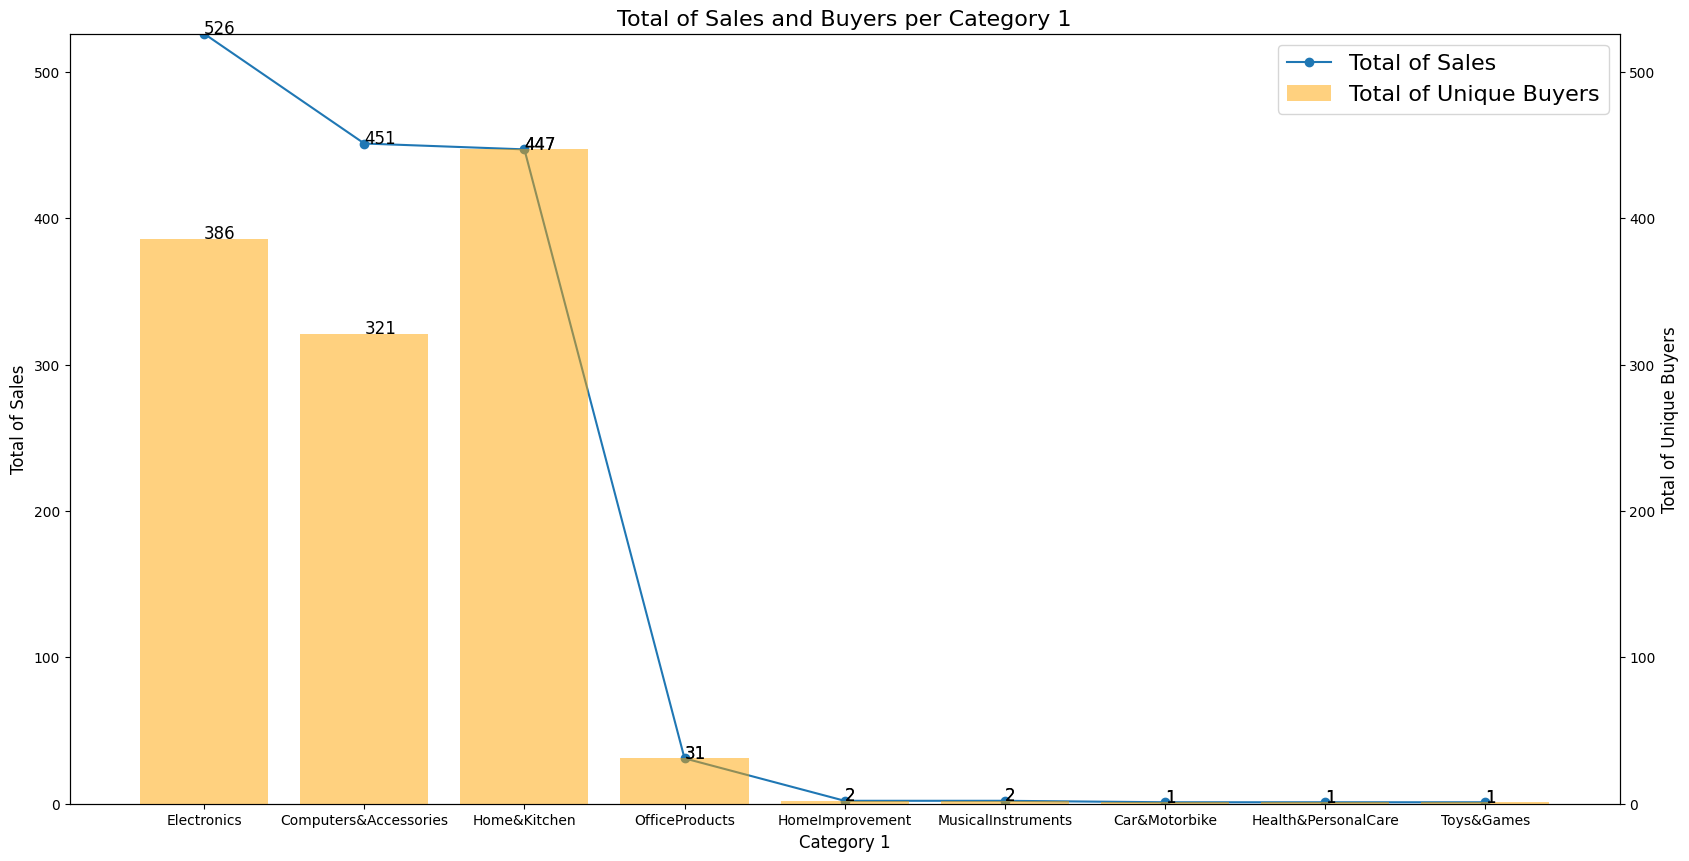

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

x = df_sales_cat1['category1'].tolist()
y1 = df_sales_cat1['Qtt_Sales'].tolist()
y2 = df_sales_cat1['Qtt_Users'].tolist()

# Plotting 'Qtt_Sales' as a line plot
ax.plot(x, y1, label="Total of Sales", marker='o')

# Creating a secondary y-axis for 'Qtt_Users' as a bar plot
ax2 = ax.twinx()
ax2.bar(x, y2, alpha=0.5, label="Total of Unique Buyers", color='orange')

# Combining legends for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=16)

# Set the limits for both y-axes to ensure the same scale
ax.set_ylim(0, max(y1 + y2))  # Adjust the limits if needed
ax2.set_ylim(0, max(y1 + y2))  # Ensure both axes share the same range

# Set labels and title
ax.set_xlabel('Category 1', fontsize=12)
ax.set_ylabel('Total of Sales', fontsize=12)
ax2.set_ylabel('Total of Unique Buyers', fontsize=12)
plt.title("Total of Sales and Buyers per Category 1", fontsize=16)

# Displaying the values on the line plot
for index in range(len(x)):
    ax.text(x[index], y1[index], y1[index], size=12)
    ax2.text(x[index], y2[index], y2[index], size=12)

plt.xticks(x, size=12)

plt.show()

In the category 1, Eletronics is the one with the most purchases made.

In [ ]:
df_sales_cat2 = df_sales.groupby(['category1', 'category2']).agg(Qtt_Sales = ('product_id', 'count'), Qtt_Users = ('user_id', 'nunique'))
df_sales_cat2

Qtt_Sales  \
category1             category2                                            
Car&Motorbike         CarAccessories                                   1   
Computers&Accessories Accessories&Peripherals                        379   
                      Components                                       5   
                      ExternalDevices&DataStorage                     18   
                      Laptops                                          1   
                      Monitors                                         2   
                      NetworkingDevices                               34   
                      Printers,Inks&Accessories                       11   
                      Tablets                                          1   
Electronics           Accessories                                     14   
                      Cameras&Photography                             16   
                      GeneralPurposeBatteries&BatteryChargers         14   
                      Headphones,Earbuds&Accessories                  66   
                      HomeAudio                                       16   
                      HomeTheater,TV&Video                           162   
                      Mobiles&Accessories                            161   
                      PowerAccessories                                 1   
                      WearableTechnology                              76   
Health&PersonalCare   HomeMedicalSupplies&Equipment                    1   
Home&Kitchen          CraftMaterials                                   7   
                      Heating,Cooling&AirQuality                     116   
                      HomeStorage&Organization                        16   
                      Kitchen&Dining                                   1   
                      Kitchen&HomeAppliances                         307   
HomeImprovement       Electrical                                       2   
MusicalInstruments    Microphones                                      2   
OfficeProducts        OfficeElectronics                                4   
                      OfficePaperProducts                             27   
Toys&Games            Arts&Crafts                                      1   

                                                               Qtt_Users  
category1             category2                                           
Car&Motorbike         CarAccessories                                   1  
Computers&Accessories Accessories&Peripherals                        257  
                      Components                                       5  
                      ExternalDevices&DataStorage                     18  
                      Laptops                                          1  
                      Monitors                                         2  
                      NetworkingDevices                               26  
                      Printers,Inks&Accessories                       11  
                      Tablets                                          1  
Electronics           Accessories                                      7  
                      Cameras&Photography                             16  
                      GeneralPurposeBatteries&BatteryChargers         14  
                      Headphones,Earbuds&Accessories                  59  
                      HomeAudio                                       16  
                      HomeTheater,TV&Video                           128  
                      Mobiles&Accessories                            101  
                      PowerAccessories                                 1  
                      WearableTechnology                              44  
Health&PersonalCare   HomeMedicalSupplies&Equipment                    1  
Home&Kitchen          CraftMaterials                                   7  
                      Heating,Cooling&AirQuality        

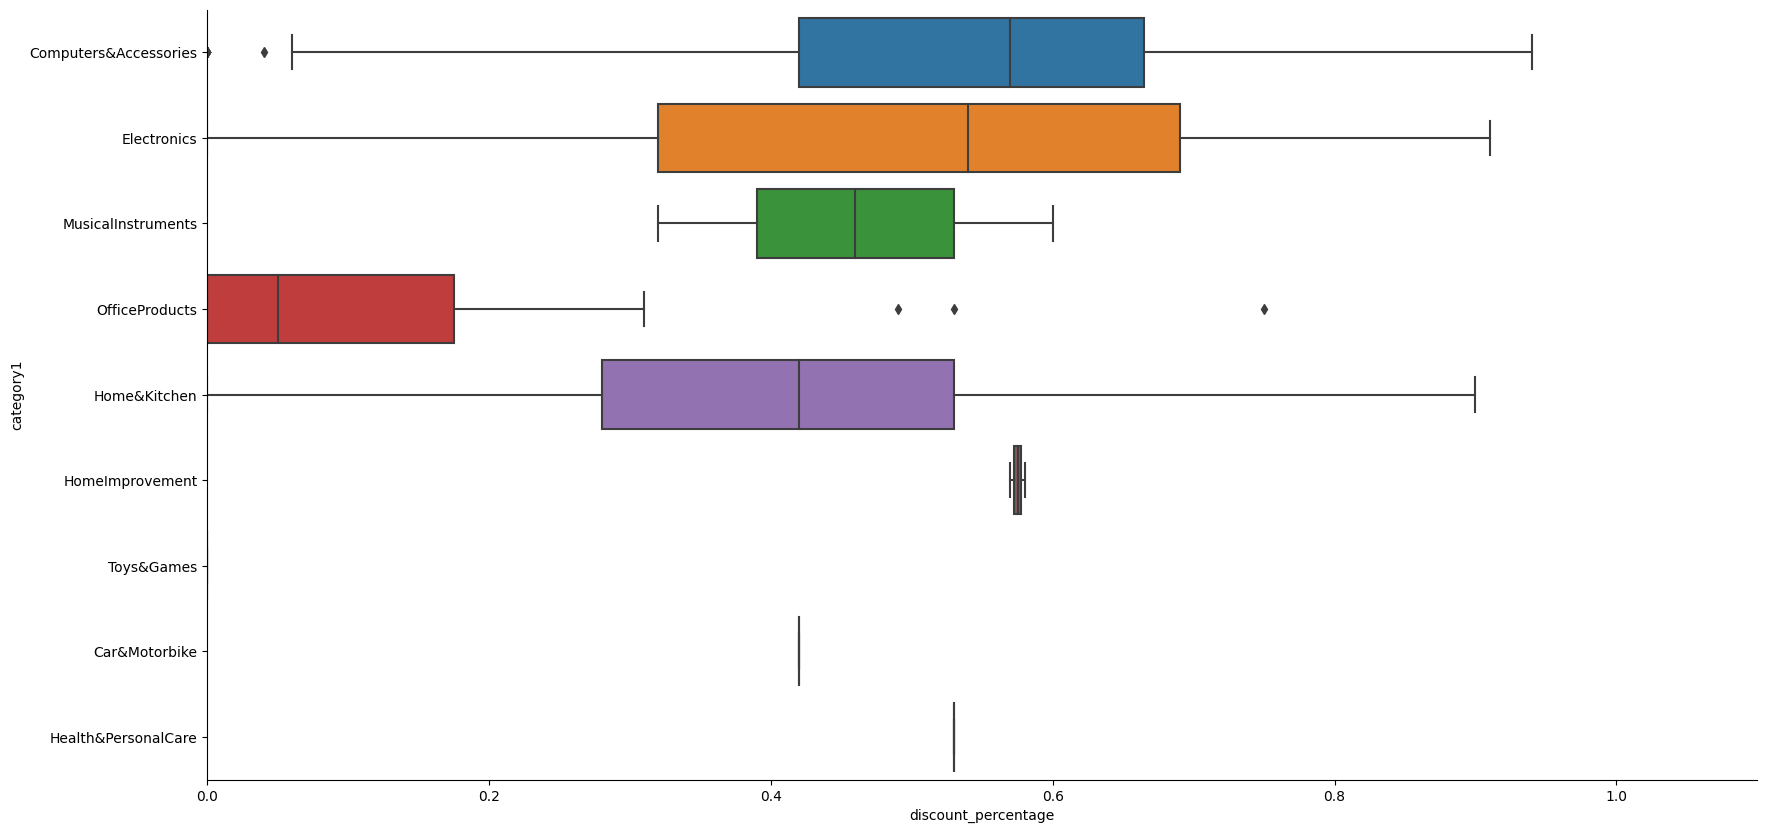

In [ ]:
#Creating the graph
fig, ax = plt.subplots(figsize=(20,10), nrows=1, ncols=1)

# BoxPlot
sns.boxplot(data=df_sales
            ,x="discount_percentage"
            ,y="category1"
            )

for spine_pos in ["top","right"]:
    ax.spines[spine_pos].set_visible(False)

# Putting a limit in x-axis
plt.xlim(0, 1.1);

In [ ]:
df_sales.groupby("category1").describe()["discount_percentage"].reset_index().sort_values(['mean', 'category1'], ascending=[False, False])

,category1,count,mean,std,min,25%,50%,75%,max
5,HomeImprovement,2.0,0.575000,0.007071,0.57,0.5725,0.575,0.5775,0.58
1,Computers&Accessories,451.0,0.539202,0.198153,0.00,0.4200,0.570,0.6650,0.94
3,Health&PersonalCare,1.0,0.530000,NaN,0.53,0.5300,0.530,0.5300,0.53
2,Electronics,526.0,0.508289,0.220287,0.00,0.3200,0.540,0.6900,0.91
6,MusicalInstruments,2.0,0.460000,0.197990,0.32,0.3900,0.460,0.5300,0.60
0,Car&Motorbike,1.0,0.420000,NaN,0.42,0.4200,0.420,0.4200,0.42
4,Home&Kitchen,447.0,0.401745,0.184338,0.00,0.2800,0.420,0.5300,0.90
7,OfficeProducts,31.0,0.123548,0.182109,0.00,0.0000,0.050,0.1750,0.75
8,Toys&Games,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00


Eletronic and computer gadgets was the products with major discount percentages.

In [ ]:
numeric_cols = df_sales.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.031073     -0.032277             0.043299   
rating_weight               -0.030573     -0.031968             0.041923   

                       rating  rating_count  rating_weight  
discounted_price     0.121132     -0.031073      -0.030573  
actual_price         0.122467     -0.032277      -0.031968  
discount_percentage -0.155679      0.043299       0.041923  
rating               1.000000      0.077248       0.084248  
rating_count         0.077248      1.000000       0.998413  
rating_weight        0.084248      0.998413       1.000000  


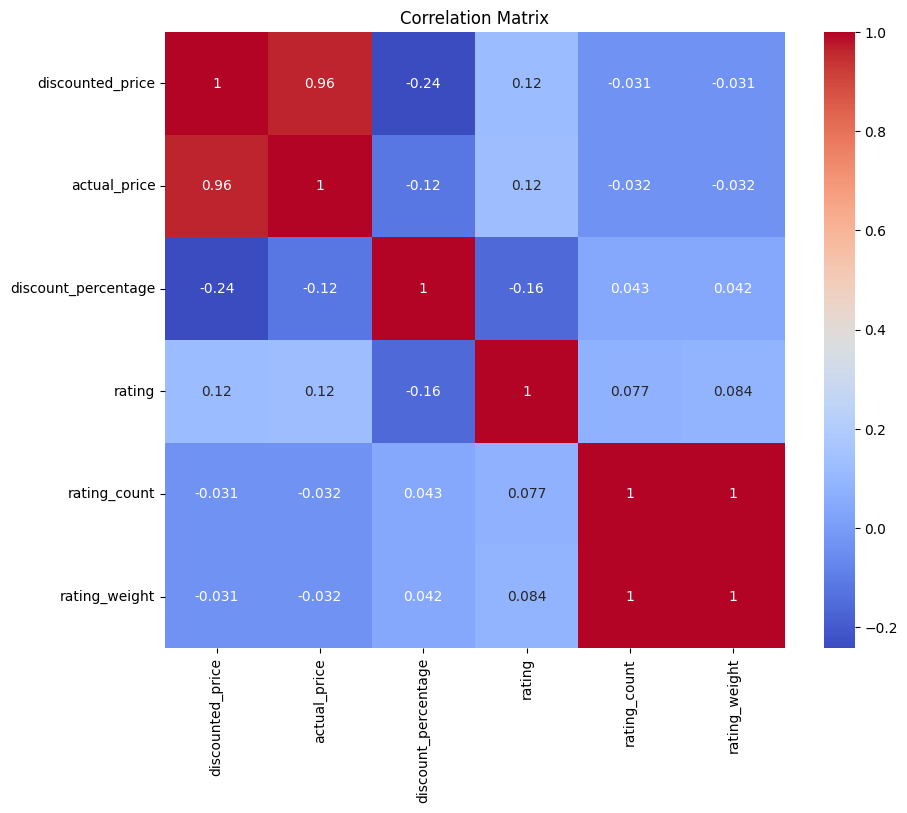

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

According to the heatmap displayed above:
1. It is possible to see a weak positive correlation between rating and the rating_count. This may suggest customers will rating more when they like the product.
2. There is a moderate positive correlation between rating and discounted_price and actual_price variables, which may suggest that the more discount was given, there is more probability to rate a product.

# Recommendation System


### Recommend the most popular product

In [ ]:
df_user_prod = df_sales.groupby(['user_id', 'product_id', 'product_name']).agg(Qtt_Purchases = ('product_id', 'count'))
df_user_prod = df_user_prod.reset_index()
df_user_prod

,user_id,product_id,product_name,Qtt_Purchases
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",B07ZR4S1G4,Universal Remote Control for All Sony TV for A...,1
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",B00HVXS7WC,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,1
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,B09XJ1LM7R,7SEVEN® Compatible for Tata Sky Remote Origina...,1
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2PZDX8,"Nokia 105 Single SIM, Keypad Mobile Phone with...",1
4,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",B09V2Q4QVQ,"Nokia 105 Single SIM, Keypad Mobile Phone with...",1
...,...,...,...,...
1353,"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7K...",B085LPT5F4,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,1
1354,"AHZJHJWFZLYD64GVP4PXVI2F4LXA,AEUCRZPOISXKHXMCZ...",B0BJ966M5K,Aquadpure Copper + Mineral RO+UV+UF 10 to 12 L...,1
1355,"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVD...",B0B3MWYCHQ,Fire-Boltt Ring 3 Smart Watch 1.8 Biggest Disp...,2
1356,"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQFVG...",B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,3


In [ ]:
df_train, df_test = train_test_split(df_user_prod, test_size=0.20, random_state=42)
print("# purchases on Train set: %d" % len(df_train))
print("# purchases on Test set: %d" % len(df_test))

# purchases on Train set: 1086
# purchases on Test set: 272


In [ ]:
user_prod_pivot_matrix_df = df_train.pivot(index='user_id',
                                                                columns = 'product_id',
                                                                values='Qtt_Purchases'
                                                              ).fillna(0)
user_prod_pivot_matrix_df

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B0073QGKAS,B0083T231O,...,B0BNXFDTZ2,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BR4F878Q
user_id,,,,,,,,,,,,,,,,,,,,,
"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6KRUEYNXJSQ,AGYPIE5BICV44WEEEPJVEFQOCJSQ,AFR7CEQKWZE53IHHOWBIPAMYKL4Q,AGBV7FBP4SEITF6UKRFKTV7O32IA,AHQVOY54QKPIQZIJ57JKCGQPVV3Q,AEMCVRRD3XQRGFHC2VFCXHJEMESQ,AFBWXU7DUWCIK5MRDCLBXWTWN7ZQ",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25JDTJPCZY47A,AFHS33MWRQGSS64EETZJGCBWXXXA,AHYXZVXUY3QTBP7IBFIUBSZVH2XQ,AH2SHWYEWDAK6A5Y2ZBEMZ2KIG3A,AEYMOGP2CYRKYZ7TIDNLGR5QPZ4Q,AGPGDCCXPI3EACMNJKBCNT57DVFA,AFPBMRYRSMD3PP3CBKLFF7EKOCXA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O3DGFNQVFFNQ,AGAFYHMPFGVPR3MOS4QAZLAWPW3A,AGNNWLEF6V57TKIFJM7SWHNFAIQQ,AFVIPOPKMOCVCX3CMXUJHMWDIMGA,AH6MFUU725GG4KA3XTALSTU2ILHA,AGQYTSKE2UBYARZYRBADQMX6BJPQ,AG7F66F724JZ2HIJQY7NOU5M5D2Q",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3ADZYHAUEZCA,AFYACVFEH3NFVZ5LGOPEBKBCLSSQ,AHTHUJC6TX2WAQ5SO24MVWJONMEQ,AHIJ2RAFZZHMUPJJKYHE2CU7ZNEQ,AENGHEFJVZDD5IE57TJ62DY7CY2A,AHOKBMECKUGAAX2ERFRKMQZNSR4Q,AE4PHOB4VRRT6W2L4E5TT4QROAWA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7KY5VN6XO7JEA,AGN47LODJXDWX6WWSS5JJLKP2HWQ,AGJRVBQJIVB445HIWTFCZOI37IQA,AHCNUZM2XGWJXQHPWYVZMS5CAEMA,AFQICBBGIA6ED2FXXYEVEVKDFOWQ,AELILYZUYXGJOFN2P7KT7OEUBM2Q,AEJHZ5W2C7AYFISGPX7WSDVSIYEQ",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVDUOSXVUCCIHQ,AFFRU7QVLXG4LNG6JKQKJ23KBA2A,AF5E74KNXXYBJVMG7HUYXNRNYY3A,AF4F4SKVD2UU7ZBJFZNNBK7ORIGA,AF3IVRFFILSUOKAXKRZBFBDRF7MQ,AF23WB7B2XKLYCA3KXEGKSBWYKOA,AHAJNAQDV3BHN5AYLY3LOWFJCS6A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
le = LabelEncoder()
df_sales['user_id_encoded'] = le.fit_transform(df_sales['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': df_sales['user_id_encoded'].value_counts().index, 'Frequency': df_sales['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

      User ID  Frequency
0        1045         10
1         622          8
2         673          8
3         253          7
4          87          7
...       ...        ...
1186      505          1
1187       11          1
1188      897          1
1189      369          1
1190      432          1

[1191 rows x 2 columns]
1045


<ipython-input-212-c6d2e46caaec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['user_id_encoded'] = le.fit_transform(df_sales['user_id'])


In [ ]:
freq_table['User ID'].unique().tolist()

[1045,
 622,
 673,
 253,
 87,
 632,
 1165,
 1005,
 297,
 319,
 1105,
 536,
 79,
 847,
 209,
 150,
 910,
 1140,
 1064,
 278,
 991,
 347,
 3,
 657,
 360,
 126,
 1159,
 328,
 616,
 168,
 696,
 1053,
 317,
 1109,
 619,
 1158,
 457,
 957,
 1030,
 573,
 965,
 267,
 173,
 323,
 141,
 848,
 846,
 661,
 17,
 488,
 990,
 1004,
 863,
 556,
 1189,
 686,
 629,
 1080,
 1041,
 215,
 828,
 888,
 303,
 799,
 403,
 794,
 442,
 350,
 856,
 1161,
 544,
 1188,
 723,
 279,
 142,
 510,
 803,
 489,
 220,
 1052,
 144,
 21,
 926,
 633,
 564,
 46,
 183,
 757,
 313,
 284,
 426,
 152,
 954,
 251,
 379,
 1137,
 208,
 628,
 184,
 1027,
 605,
 364,
 465,
 606,
 699,
 5,
 367,
 781,
 462,
 637,
 445,
 306,
 67,
 725,
 395,
 503,
 4,
 199,
 514,
 707,
 26,
 70,
 1180,
 759,
 993,
 1012,
 774,
 312,
 392,
 1107,
 670,
 344,
 179,
 1119,
 735,
 978,
 212,
 1141,
 702,
 195,
 414,
 575,
 277,
 594,
 771,
 519,
 227,
 596,
 322,
 880,
 1111,
 332,
 631,
 57,
 691,
 560,
 518,
 742,
 55,
 903,
 80,
 400,
 324,
 41,
 361,
 1

In [ ]:
def recommend_products(df_sales, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df_sales['about_product'] = df_sales['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df_sales['about_product'])

    # Get the purchase history for the user
    user_history = df_sales[df_sales['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df_sales.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]
        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df_sales.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [ ]:
recommend_products(df_sales, 893)

<ipython-input-223-ceef65480066>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['about_product'] = df_sales['about_product'].fillna('')  # fill NaN values with empty string


,Id Encoded,recommended product,score recommendation
0,893,"FYA Handheld Vacuum Cleaner Cordless, Wireless...",1.000000
1,893,Eureka Forbes Active Clean 700 Watts Powerful ...,0.347227
2,893,AMERICAN MICRONIC- Imported Wet & Dry Vacuum C...,0.317435
3,893,"INALSA Upright Vacuum Cleaner, 2-in-1,Handheld...",0.310397
4,893,INALSA Vaccum Cleaner Handheld 800W High Power...,0.298666


In [ ]:
recommend_products(df_sales, 1045)

<ipython-input-223-ceef65480066>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['about_product'] = df_sales['about_product'].fillna('')  # fill NaN values with empty string


,Id Encoded,recommended product,score recommendation
0,1045,Noise Buds Vs104 Bluetooth Truly Wireless in E...,1.000000
1,1045,boAt Airdopes 141 Bluetooth Truly Wireless in ...,0.285544
2,1045,boAt Airdopes 191G True Wireless Earbuds with ...,0.203876
3,1045,Noise Buds VS201 V2 in-Ear Truly Wireless Earb...,0.191922
4,1045,boAt Airdopes 181 in-Ear True Wireless Earbuds...,0.189957


In [ ]:
#Validating that it is only recommending products never purchased by the customer
df_sales[(df_sales['user_id_encoded']==893) & (df_sales['product_name'].str.contains('Eureka Forbes Active Clean 700 Watts '))]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,product_link,rating_weight,category1,category2,category3,category4,category5,category6,category7,user_id_encoded


In [ ]:
df_sales[df_sales['user_id_encoded']==893]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,product_link,rating_weight,category1,category2,category3,category4,category5,category6,category7,user_id_encoded
1335,B09G2VTHQM,"AGARO Classic Portable Yogurt Maker, 1.2L Capa...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,587.0,1295.0,0.55,4.1,557.0,1.2 Litres Capacity|Double Deck Seal|Stainless...,"AGYTFOW77SU6CYA7L2ID3IYBWMLA,AHAHGFYVEV3DXUG3G...",...,https://www.amazon.in/AGARO-Portable-Capacity-...,2283.7,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,YogurtMakers,NaN,NaN,NaN,893
